In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'

In [49]:
# API 사용
import FinanceDataReader as fdr
symbol_kospi =['KS11', '005930', '000660']
data = {}
for symbol in symbol_kospi:
    data[symbol] = fdr.DataReader(symbol, '2020-01-01', '2023-12-31')

In [40]:
symbol_kospi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 598 entries, 2020-11-02 to 2023-03-31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    598 non-null    float64
 1   High    598 non-null    float64
 2   Low     598 non-null    float64
 3   Close   598 non-null    float64
 4   Volume  598 non-null    int64  
 5   Change  598 non-null    float64
 6   UpDown  598 non-null    int64  
 7   Comp    598 non-null    float64
 8   Amount  598 non-null    int64  
 9   MarCap  598 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 51.4 KB


In [50]:
symbol_kospi

['KS11', '005930', '000660']

### 문제1

In [51]:
# 할로윈 전략 수익률 계산 함수
def calculate_returns(data, start_month, end_month):
    returns = []
    for year in range(2000, 2023):
        start_date = f'{year}-{start_month}-01'
        end_date = f'{year+1}-{end_month}-30'
        try:
            start_price = data.loc[start_date, 'Close']
            end_price = data.loc[end_date, 'Close']
            strategy_return = (end_price / start_price) - 1
            returns.append(strategy_return)
        except KeyError:
            continue
    return returns

In [53]:
# 할로윈 전략 적용 (11월-4월, 5월-10월)
halloween_returns = {symbol: calculate_returns(data[symbol], '11', '04') for symbol in symbol_kospi}
summer_returns = {symbol: calculate_returns(data[symbol], '05', '10') for symbol in symbol_kospi}

# 드로우다운 계산 함수

In [43]:

# 누적 수익률 계산
total_return = 1
for r in annual_returns:
    total_return *= (1 + r)
total_return -= 1  # 최종 누적 수익률

# 투자 기간 계산
start_date = symbol_kospi.index[0]
end_date = symbol_kospi.index[-1]
diff_datetime = end_date - start_date
investment_years = diff_datetime.days / 365

# CAGR 계산
cagr = (1 + total_return) ** (1 / investment_years) - 1

# 결과 출력
print(f"할로윈 전략 누적 수익률: {total_return * 100:.2f}%")
print(f"할로윈 전략 연평균 복리 수익률 (CAGR): {cagr * 100:.2f}%")

할로윈 전략 누적 수익률: 0.00%
할로윈 전략 연평균 복리 수익률 (CAGR): 0.00%


### 문제2

In [44]:

# MDD 계산
cumulative_max = symbol_kospi['Close'].cummax()  # 누적 최고값
drawdown = (symbol_kospi['Close'] - cumulative_max) / cumulative_max  # 하락률 계산
mdd = drawdown.min()  # 최대 낙폭 (음수)




In [45]:
# 결과 출력
print(f"최대 낙폭 (MDD): {mdd * 100:.2f}%")

최대 낙폭 (MDD): -34.79%


### 추가 과제

11월~4월 누적 수익률: 65.55%, CAGR: 5.17%
5월~10월 누적 수익률: 0.00%, CAGR: 0.00%
최대 낙폭 (MDD): -54.54%


/tmp/ipykernel_70905/4123405873.py:86: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


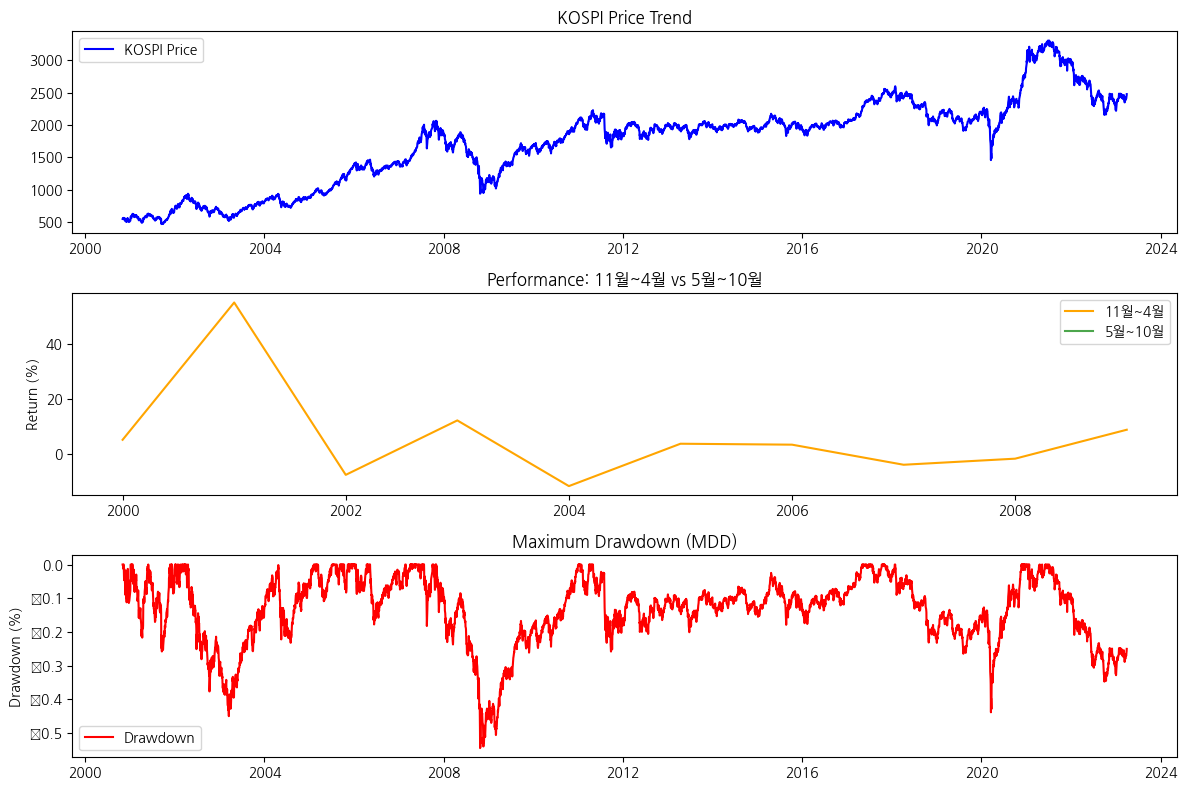

In [46]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_returns(data, start_month, end_month):
    """
    특정 기간(월 기준)의 수익률을 계산합니다.
    """
    returns = []
    for year in range(data.index.year.min(), data.index.year.max()):
        try:
            start_price = data.loc[f'{year}-{start_month:02d}-01', 'Close']
            end_price = data.loc[f'{year + (end_month < start_month)}-{end_month:02d}-30', 'Close']
            returns.append((end_price / start_price) - 1)
        except KeyError:
            continue
    return returns

def calculate_cagr(total_return, years):
    """
    CAGR(연평균 복리 수익률) 계산.
    """
    return (1 + total_return) ** (1 / years) - 1

def calculate_mdd(data):
    """
    MDD (Maximum Drawdown) 계산.
    """
    cumulative_max = data['Close'].cummax()
    drawdown = (data['Close'] - cumulative_max) / cumulative_max
    return drawdown.min()

def halloween_strategy(data):
    """
    할로윈 전략과 반대 전략을 비교하고 성과를 시각화합니다.
    """
    # 11월~4월(할로윈 전략)과 5월~10월(반대 전략)의 수익률 계산
    returns_11_4 = calculate_returns(data, 11, 4)
    returns_5_10 = calculate_returns(data, 5, 10)
    
    # 누적 수익률 계산
    total_return_11_4 = np.prod([1 + r for r in returns_11_4]) - 1
    total_return_5_10 = np.prod([1 + r for r in returns_5_10]) - 1

    # CAGR 계산
    investment_years = len(returns_11_4)
    cagr_11_4 = calculate_cagr(total_return_11_4, investment_years)
    cagr_5_10 = calculate_cagr(total_return_5_10, investment_years)

    # MDD 계산
    mdd = calculate_mdd(data)

    # 결과 출력
    print(f"11월~4월 누적 수익률: {total_return_11_4 * 100:.2f}%, CAGR: {cagr_11_4 * 100:.2f}%")
    print(f"5월~10월 누적 수익률: {total_return_5_10 * 100:.2f}%, CAGR: {cagr_5_10 * 100:.2f}%")
    print(f"최대 낙폭 (MDD): {mdd * 100:.2f}%")

    # 시각화
    plt.figure(figsize=(12, 8))

    # KOSPI 종가
    plt.subplot(3, 1, 1)
    plt.plot(data['Close'], label='KOSPI Price', color='blue')
    plt.title('KOSPI Price Trend')
    plt.legend()

    # 수익률 비교
    plt.subplot(3, 1, 2)
    plt.plot(range(data.index.year.min(), data.index.year.min() + len(returns_11_4)), [r * 100 for r in returns_11_4], color='orange', label='11월~4월')
    plt.plot(range(data.index.year.min(), data.index.year.min() + len(returns_5_10)), [r * 100 for r in returns_5_10], color='green', label='5월~10월', alpha=0.7)
    #plt.axhline(0, color='black', linewidth=0.8)
    plt.title('Performance: 11월~4월 vs 5월~10월')
    plt.ylabel('Return (%)')
    plt.legend()

    # Drawdown
    plt.subplot(3, 1, 3)
    cumulative_max = data['Close'].cummax()
    drawdown = (data['Close'] - cumulative_max) / cumulative_max
    plt.plot(drawdown, label='Drawdown', color='red')
    plt.title('Maximum Drawdown (MDD)')
    plt.ylabel('Drawdown (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 실행
if __name__ == "__main__":
    # KOSPI 데이터 불러오기
    kospi_data = fdr.DataReader('KS11', '2000-11', '2023-04')
    halloween_strategy(kospi_data)


/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


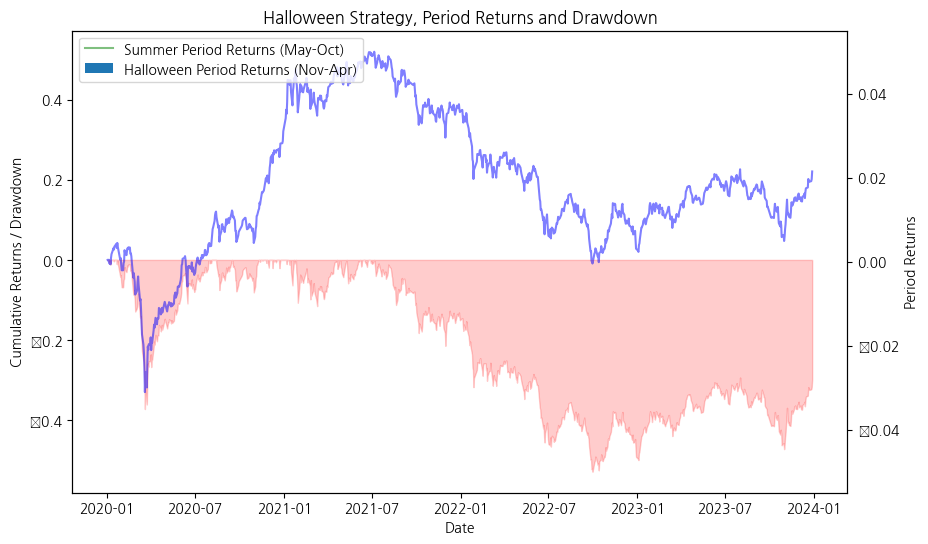

In [47]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기 (예시: KOSPI 2000년~2023년)
symbol_kospi = fdr.DataReader('KS11', '2020-01-01', '2023-12-31')

# 가격 변동 (종가 기준)
symbol_kospi['Price'] = symbol_kospi['Close']

# 할로윈 전략: 11월-4월 기간의 수익률 계산
halloween_returns = []
for year in range(2020, 2023):  # 2000년부터 2023년까지
    start_date = f'{year}-11-01'
    end_date = f'{year+1}-04-30'  # 11월부터 다음 해 4월까지
    try:
        start_price = symbol_kospi.loc[start_date, 'Close']
        end_price = symbol_kospi.loc[end_date, 'Close']
        halloween_return = (end_price / start_price) - 1
        halloween_returns.append(halloween_return)
    except KeyError:
        continue

# 5월-10월 기간의 수익률 계산
summer_returns = []
for year in range(2020, 2023):  # 2000년부터 2023년까지
    start_date = f'{year}-05-01'
    end_date = f'{year}-10-31'  # 5월부터 10월까지
    try:
        start_price = symbol_kospi.loc[start_date, 'Close']
        end_price = symbol_kospi.loc[end_date, 'Close']
        summer_return = (end_price / start_price) - 1
        summer_returns.append(summer_return)
    except KeyError:
        continue

# 드로우다운 계산 (Max Drawdown)
symbol_kospi['Cumulative Returns'] = (symbol_kospi['Close'] / symbol_kospi['Close'].iloc[0]) - 1
symbol_kospi['Rolling Max'] = symbol_kospi['Cumulative Returns'].cummax()
symbol_kospi['Drawdown'] = symbol_kospi['Cumulative Returns'] - symbol_kospi['Rolling Max']
symbol_kospi['Max Drawdown'] = symbol_kospi['Drawdown'].min()

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 가격 변동 그래프 (Line chart)
ax1.plot(symbol_kospi.index, symbol_kospi['Cumulative Returns'], label='Price Change', color='blue', alpha=0.5)

# 할로윈 기간 수익률 (Bar chart)
ax2 = ax1.twinx()
ax2.bar(symbol_kospi.index[:len(halloween_returns)], halloween_returns, label='Halloween Period Returns (Nov-Apr)', color='orange', alpha=0.5)

# 5월-10월 수익률 (Bar chart)
ax2.plot(symbol_kospi.index[:len(summer_returns)], summer_returns, label='Summer Period Returns (May-Oct)', color='green', alpha=0.5)

# 드로우다운 (Area chart)
ax1.fill_between(symbol_kospi.index, symbol_kospi['Drawdown'], color='red', alpha=0.2, label='Drawdown')

# 레이블 및 제목 설정
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Returns / Drawdown')
ax2.set_ylabel('Period Returns')
plt.title('Halloween Strategy, Period Returns and Drawdown')
plt.legend(loc='upper left')
plt.show()
